In [18]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
# import xgboost as xgb
from sklearn.metrics import precision_recall_curve
import altair as alt
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import shap
import altair as alt
import pickle
from joblib import dump, load
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm

In [86]:
import importlib
importlib.reload(xgb)

<module 'xgboost' from 'C:\\Users\\darkc\\anaconda3\\lib\\site-packages\\xgboost\\__init__.py'>

In [88]:
importlib.reload(xgboost)

NameError: name 'xgboost' is not defined

# Data Preparation

In [4]:
df10 = pd.read_csv('drive-download-20220307T231112Z-001/corp_trends2010.csv')
df12 = pd.read_csv('drive-download-20220307T231112Z-001/corp_trends2012.csv')
df14 = pd.read_csv('drive-download-20220307T231112Z-001/corp_trends2014.csv')
df16 = pd.read_csv('drive-download-20220307T231112Z-001/corp_trends2016.csv')
df18 = pd.read_csv('drive-download-20220307T231112Z-001/corp_trends2018.csv')
df20 = pd.read_csv('drive-download-20220307T231112Z-001/corp_trends2020.csv')
trends = [df10,df12,df14,df16,df18,df20]

In [5]:
newTrends = []
years = [2010,2012,2014,2016,2018,2020]
for i in range(len(years)):
    j = trends[i].rename(columns={"Unnamed: 0": "state"})
    y = years[i]
    j['year'] = y
    newTrends.append(j)

In [6]:
lTrends = newTrends.pop(0)

In [7]:
lTrends

state  3M Company  AT&T  Absolut  Adidas  Airbnb  Aldi  \
0                 Alaska           0    70       10      44      56     3   
1                Alabama          33    85       53      42      13    39   
2               Arkansas          21    77       21      49      17    18   
3                Arizona          14    37       45      47      21    11   
4             California          10    42       68      98      51    38   
5               Colorado          28    47       44      51      29    16   
6            Connecticut          18    60       75      61      37    61   
7               Delaware           0    45       66      85       0    44   
8                Florida          11    64       42      58      30    49   
9                Georgia          25    70       46      68      22    59   
10                Hawaii           0    50       45      55     100     3   
11                  Iowa          43    22       41      57       7    59   
12                 Idaho          60    34       67      35      37     5   
13              Illinois          29    64       58      62      29   100   
14               Indiana          25    63       65      65      24    82   
15                Kansas          12    50       30      73      10    63   
16              Kentucky          15    79       41      56      20    61   
17             Louisiana          21   100       52      60      21     9   
18         Massachusetts          14    42       99      54      48    24   
19              Maryland          17    50       47      67      27    46   
20                 Maine           0    35       41      58      76     7   
21              Michigan          18    52       70      59      17    93   
22             Minnesota         100    40       49      46      30    73   
23              Missouri          20    71       42      58      22    75   
24           Mississippi           0    70       24      56       8    64   
25               Montana           0    19       38      39      63     0   
26        North Carolina           9    56       49      52      22    62   
27          North Dakota           0    28       95      44       0     6   
28              Nebraska          10    23       38      68       8    39   
29         New Hampshire          11    30       81      52      62    14   
30            New Jersey          28    53       63      61      32    51   
31            New Mexico          43    28       51      53       0     6   
32                Nevada          25    54       49      66      15     5   
33              New York          15    51      100      82      95    30   
34                  Ohio          22    49       46      55      11    80   
35              Oklahoma          18    84       45      47      20    57   
36                Oregon          14    48       44      87      61     6   
37          Pennsylvania          21    53       71      59      39    63   
38          Rhode Island           0    36       78      56      56    60   
39        South Carolina          23    57       43      63      14    60   
40          South Dakota           0    23       50      51      31     8   
41             Tennessee          14    71       37      52      20    60   
42                 Texas          14    75       41      61      20    48   
43                  Utah          48    32       30      52      28     5   
44              Virginia           6    22       76     100      19    59   
45               Vermont           0    25       71      55      15    27   
46            Washington          17    50       69      52      34     7   
47             Wisconsin          18    48       64      64      22    80   
48         West Virginia          25    55       29      50       0    46   
49               Wyoming           0    27       29      65       0     9   
50  District of Columbia           0    54       62      62      57    41   

    Allstate  

In [8]:
# ndf  = df10.copy()
for i in newTrends:
    lTrends = lTrends.append(i)
lTrends

state  3M Company  AT&T  Absolut  Adidas  Airbnb  Aldi  \
0                 Alaska           0    70       10      44      56     3   
1                Alabama          33    85       53      42      13    39   
2               Arkansas          21    77       21      49      17    18   
3                Arizona          14    37       45      47      21    11   
4             California          10    42       68      98      51    38   
..                   ...         ...   ...      ...     ...     ...   ...   
46            Washington          32    31       54      53      79     2   
47             Wisconsin          37    41       73      63      58    78   
48         West Virginia          18    66       44      35      30    53   
49               Wyoming           0    28       35      33      50     3   
50  District of Columbia           0    22       71      61     100    27   

    Allstate  Amazon  American Airlines  ...  Wells Fargo  Wendys  White Claw  \
0         70      91                 45  ...          100      21           0   
1         59      75                 38  ...           17      48           0   
2         41      63                 63  ...           18      46           0   
3         44      80                 63  ...           79      52           0   
4         25      64                 46  ...           41      20          14   
..       ...     ...                ...  ...          ...     ...         ...   
46        48      95                 31  ...           37      38          62   
47        29      86                 44  ...           24      36          70   
48        52      85                 20  ...            8      87          56   
49        52      96                 29  ...           62      55          59   
50        37      76                 78  ...           40      19          55   

    Whole Foods  Wish.com  Woodford Reserve  Yum!  Zoom  eBay  year  
0            14         0                 0     0    77    76  2010  
1            39         0                 6     0    86    90  2010  
2            32        83                 3     0    73    94  2010  
3            48        55                 3     0    81    68  2010  
4            54         8                 2     0    95    53  2010  
..          ...       ...               ...   ...   ...   ...   ...  
46           27        52                10     0    82    53  2020  
47           14        58                13     0    55    64  2020  
48            4       100                20     0    36   100  2020  
49            7        54                 4     0    47    63  2020  
50          100        42                14     0    95    31  2020  

[306 rows x 194 columns]

In [9]:
X = lTrends.copy()

In [9]:
X

state  3M Company  AT&T  Absolut  Adidas  Airbnb  Aldi  \
0                 Alaska           0    70       10      44      56     3   
1                Alabama          33    85       53      42      13    39   
2               Arkansas          21    77       21      49      17    18   
3                Arizona          14    37       45      47      21    11   
4             California          10    42       68      98      51    38   
..                   ...         ...   ...      ...     ...     ...   ...   
46            Washington          32    31       54      53      79     2   
47             Wisconsin          37    41       73      63      58    78   
48         West Virginia          18    66       44      35      30    53   
49               Wyoming           0    28       35      33      50     3   
50  District of Columbia           0    22       71      61     100    27   

    Allstate  Amazon  American Airlines  ...  Wells Fargo  Wendys  White Claw  \
0         70      91                 45  ...          100      21           0   
1         59      75                 38  ...           17      48           0   
2         41      63                 63  ...           18      46           0   
3         44      80                 63  ...           79      52           0   
4         25      64                 46  ...           41      20          14   
..       ...     ...                ...  ...          ...     ...         ...   
46        48      95                 31  ...           37      38          62   
47        29      86                 44  ...           24      36          70   
48        52      85                 20  ...            8      87          56   
49        52      96                 29  ...           62      55          59   
50        37      76                 78  ...           40      19          55   

    Whole Foods  Wish.com  Woodford Reserve  Yum!  Zoom  eBay  year  
0            14         0                 0     0    77    76  2010  
1            39         0                 6     0    86    90  2010  
2            32        83                 3     0    73    94  2010  
3            48        55                 3     0    81    68  2010  
4            54         8                 2     0    95    53  2010  
..          ...       ...               ...   ...   ...   ...   ...  
46           27        52                10     0    82    53  2020  
47           14        58                13     0    55    64  2020  
48            4       100                20     0    36   100  2020  
49            7        54                 4     0    47    63  2020  
50          100        42                14     0    95    31  2020  

[306 rows x 194 columns]

In [10]:
Xtrain = X[X['year'] < 2020]
Xtest = X[X['year'] >= 2020]

In [11]:
ef10 = pd.read_csv('elections data/2010_election_data.csv')
ef12 = pd.read_csv('elections data/2012_election_data.csv')
ef14 = pd.read_csv('elections data/2014_election_data.csv')
ef16 = pd.read_csv('elections data/2016_election_data.csv')
ef18 = pd.read_csv('elections data/2018_election_data.csv')
ef20 = pd.read_csv('elections data/2020_election_data.csv')
elections = [ef10,ef12,ef14,ef16,ef18,ef20]

In [12]:
start = elections.pop(0)
# newLabels = []
years = [2010,2012,2014,2016,2018,2020]
for i in elections:
    j = i.drop("Unnamed: 0",axis=1)
    start = start.append(j)

In [13]:
Y = start.copy()

In [14]:
Y = Y.fillna(0).drop('Unnamed: 0',axis=1)

In [15]:
Y['maskActual'] = Y['rep_votes_share'].apply(lambda x: round(x))

In [16]:
fv = pd.merge(X,Y,on=['state','year'])
fv = fv.drop(['Doordash'],axis=1)

In [17]:
train = fv[fv['year']<2020]
test = fv[fv['year']>=2020]

Xtrain = train.loc[:, '3M Company':'eBay']
Xtest = test.loc[:, '3M Company':'eBay']

YtrainR = train['rep_votes_share']
YtestR = test['rep_votes_share']
YtrainC = train['maskActual']
YtestC = test['maskActual']

# Dummy Model

In [22]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(Xtrain, YtrainC)
dummy_clf.predict(Xtest)
dummy_clf.score(Xtest, YtestC)

0.58

# Tuning LogReg

In [23]:
logreg = LogisticRegression()

In [24]:
parameters = [{
    'penalty' : ['l2'],
#     'dual': ['False'],
#     'multi_class' : ['ovr'],
    'tol': [1e-2,1e-3,1e-4,1e-5,1e-6],
    'C'       : np.logspace(-3,3,7),
    'class_weight' : ['balanced','None'],
    'solver'  : ['newton-cg'],
    'max_iter' : [100,150,200,250,300,350,400,450]
},
{
    'penalty' : ['l2'],
#     'dual': ['False'],
#     'multi_class' : ['ovr'],
    'tol': [1e-2,1e-3,1e-4,1e-5,1e-6],
    'C'       : np.logspace(-3,3,7),
    'class_weight' : ['balanced','None'],
    'solver'  : ['lbfgs', 'sag'],
    'max_iter' : [100,150,200,250,300,350,400,450]
},
{
    'penalty' : ['l2','l1'],
    'dual': [True,False],
#     'multi_class' : ['ovr'],
    'tol': [1e-2,1e-3,1e-4,1e-5,1e-6],
    'C'       : np.logspace(-3,3,7),
    'class_weight' : ['balanced','None'],
    'solver'  : ['liblinear'],
    'max_iter' : [100,150,200,250,300,350,400,450]
},
{
    'penalty' : ['l2','l1','elasticnet'],
#     'dual': ['False'],
#     'multi_class' : ['ovr'],
    'tol': [1e-2,1e-3,1e-4,1e-5,1e-6],
    'C'       : np.logspace(-3,3,7),
    'class_weight' : ['balanced','None'],
    'solver'  : ['saga'],
    'max_iter' : [100,150,200,250,300,350,400,450]
}  
]

In [25]:
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10,
                  n_jobs = -1)

In [26]:
clf.fit(Xtrain,YtrainC)

One or more of the test scores are non-finite: [0.912 0.908 0.908 ...   nan   nan   nan]


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'class_weight': ['balanced', 'None'],
                          'max_iter': [100, 150, 200, 250, 300, 350, 400, 450],
                          'penalty': ['l2'], 'solver': ['newton-cg'],
                          'tol': [0.01, 0.001, 0.0001, 1e-05, 1e-06]},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1....
                          'max_iter': [100, 150, 200, 250, 300, 350, 400, 450],
                          'penalty': ['l2', 'l1'], 'solver': ['liblinear'],
                          'tol': [0.01, 0.001, 0.0001, 1e-05, 1e-06]},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'class_weight': ['balanced', 'None'],
                          'max_iter': [100, 150, 200, 250, 300, 350, 400, 450

In [27]:
bestLogReg = clf.best_estimator_
bestLogReg

LogisticRegression(C=100.0, class_weight='balanced', max_iter=450, penalty='l1',
                   solver='liblinear', tol=0.01)

In [111]:
filename = 'logRegBase.sav'
pickle.dump(bestLogReg, open(filename, 'wb'))

In [37]:
fn = 'logRegBase.sav'
bLogReg = load(fn)

In [38]:
bLogReg

LogisticRegression(C=0.001, class_weight='balanced', max_iter=150, solver='sag',
                   tol=0.01)

In [39]:
print('Train')
print("Accuracy:",bLogReg.score(Xtrain, YtrainC))

Train
Accuracy: 0.988


In [40]:
print('Test')
print("Accuracy:",bLogReg.score(Xtest, YtestC))

Test
Accuracy: 0.8


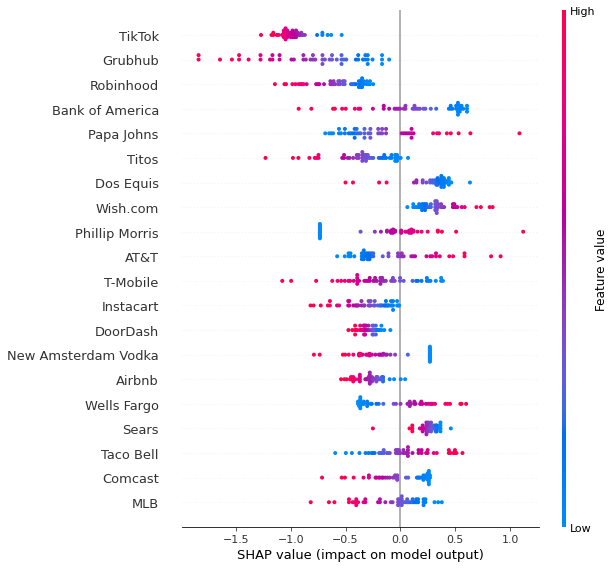

In [41]:
explainer = shap.Explainer(bLogReg, Xtrain)
shap_values = explainer(Xtest)
shap.summary_plot(shap_values)

In [43]:
test.head()

state  3M Company  AT&T  Absolut  Adidas  Airbnb  Aldi  Allstate  \
250      Alaska           0    63       56      28      62     1        66   
251     Alabama          35    73       65      60      60    44        92   
252    Arkansas          28    81       47      48      55    21        47   
253     Arizona          29    28       53      59      80     7        56   
254  California          32    47       56      84      88    17        42   

     Amazon  American Airlines  ...  eBay  year    DEMOCRAT  INDEPENDENT  \
250      82                 29  ...    50  2020    159856.0          0.0   
251      78                 33  ...    65  2020    608809.0          0.0   
252      72                 45  ...    65  2020    330485.0          0.0   
253      85                100  ...    53  2020   1629318.0          0.0   
254      82                 42  ...    53  2020  11084234.0          0.0   

     REPUBLICAN       Total  dem_votes_share  rep_votes_share  \
250    192126.0    351982.0         0.454160         0.545840   
251   1416012.0   2024821.0         0.300673         0.699327   
252    828266.0   1158751.0         0.285208         0.714792   
253   1638516.0   3267834.0         0.498593         0.501407   
254   5640667.0  16724901.0         0.662738         0.337262   

     indep_votes_share  maskActual  
250                0.0           1  
251                0.0           1  
252                0.0           1  
253                0.0           1  
254                0.0           0  

[5 rows x 201 columns]

# Error Analysis

In [48]:
analysis = test[['state','rep_votes_share','dem_votes_share','maskActual']]
analysis['margin'] = analysis['rep_votes_share'] - analysis['dem_votes_share']
analysis['pred'] = bLogReg.predict(Xtest)
errors = []
for i, r in analysis.iterrows():
    a = r['maskActual']
    p = r['pred']
    if (a==1) and (p==1):
        errors.append(1)
    elif (a==1) and (p!=1):
        errors.append(0.5)
    elif (a==0) and (p==0):
        errors.append(-1)
    else:
        errors.append(-0.5)
analysis['errors'] = errors


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [50]:
analysis.to_csv('errors.csv')

# XGB Model

In [55]:
params = { 'max_depth': [3,5,7,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100,250, 500, 1000],
           'colsample_bytree': [0.3,0.5, 0.7],
          'alpha':[0.0,0.01,0.1,0.5,1.0],
          'lambda':[0.0,0.01,0.1,0.5,1.0],
          'tree_method':['exact','gpu_hist'],
#           'eval_metric': ['error','logloss'],
          'objective': ['binary:logistic']
         }
xgbr = xgb.XGBClassifier(seed = 42)

xgbCLF = RandomizedSearchCV(estimator=xgbr, 
                   param_distributions=params,
                   scoring='neg_mean_squared_error', 
                   verbose=2,
                      n_jobs = -1)

In [56]:
xgbCLF.fit(Xtrain,YtrainC)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


One or more of the test scores are non-finite: [   nan -0.132 -0.108 -0.132    nan    nan    nan    nan    nan    nan]
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[16:26:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_jobs=-1,
                   param_distributions={'a

In [57]:
xgbCLF.best_params_

{'tree_method': 'exact',
 'objective': 'binary:logistic',
 'n_estimators': 500,
 'max_depth': 10,
 'learning_rate': 0.01,
 'lambda': 0.01,
 'colsample_bytree': 0.3,
 'alpha': 0.01}

In [58]:
xgbBest = xgbCLF.best_estimator_

In [60]:
# Use the forest's predict method on the test data
XGBpredictions = xgbBest.predict(Xtrain)
# Calculate the absolute errors
errors = abs(XGBpredictions - YtrainC)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Mean Absolute Error: 3.83 degrees.

Mean Absolute Error: 0.0 degrees.


In [61]:
# Use the forest's predict method on the test data
XGBpredictions = xgbBest.predict(Xtest)
# Calculate the absolute errors
errors = abs(XGBpredictions - YtestC)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Mean Absolute Error: 3.83 degrees.

Mean Absolute Error: 0.1 degrees.


In [63]:
YtrainC

0      1
1      1
2      1
3      1
4      0
      ..
245    0
246    0
247    0
248    1
249    1
Name: maskActual, Length: 250, dtype: int64

In [64]:
XGBpredictions = xgbBest.predict(Xtest)
XGBpredictions

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1], dtype=int64)

In [65]:
XGBpredictions = xgbBest.predict(Xtrain)
print('Accuracy:',accuracy_score(YtrainC, XGBpredictions))
print('Recall:',recall_score(YtrainC, XGBpredictions))
print('Precision:',precision_score(YtrainC, XGBpredictions))

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [66]:
XGBpredictions = xgbBest.predict(Xtest)
print('Accuracy:',accuracy_score(YtestC, XGBpredictions))
print('Recall:',recall_score(YtestC, XGBpredictions))
print('Precision:',precision_score(YtestC, XGBpredictions))

Accuracy: 0.9
Recall: 0.8620689655172413
Precision: 0.9615384615384616


In [ ]:
explainer = shap.Explainer(bLogReg, Xtrain)
shap_values = explainer(Xtest)

In [68]:
Xtrain

3M Company  AT&T  Absolut  Adidas  Airbnb  Aldi  Allstate  Amazon  \
0             0    70       10      44      56     3        70      91   
1            33    85       53      42      13    39        59      75   
2            21    77       21      49      17    18        41      63   
3            14    37       45      47      21    11        44      80   
4            10    42       68      98      51    38        25      64   
..          ...   ...      ...     ...     ...   ...       ...     ...   
245           0    35       40      39      80    12        28     100   
246           8    35       54      61      77     3        35      97   
247          30    42       49      57      46    69        26      81   
248           4    72       56      33      26    39        39      79   
249           0    26       48      32      42     3        39      90   

     American Airlines  American Express  ...  Wegmans  Wells Fargo  Wendys  \
0                   45                37  ...        0          100      21   
1                   38                45  ...        2           17      48   
2                   63                38  ...        3           18      46   
3                   63                87  ...        3           79      52   
4                   46                50  ...        3           41      20   
..                 ...               ...  ...      ...          ...     ...   
245                 37                39  ...        5            6      15   
246                 26                40  ...        1           37      31   
247                 33                33  ...        1           23      28   
248                 17                26  ...        4            8      63   
249                 18                33  ...        0           63      44   

     White Claw  Whole Foods  Wish.com  Woodford Reserve  Yum!  Zoom  eBay  
0             0           14         0                 0     0    77    76  
1             0           39         0                 6     0    86    90  
2             0           32        83                 3     0    73    94  
3             0           48        55                 3     0    81    68  
4            14           54         8                 2     0    95    53  
..          ...          ...       ...               ...   ...   ...   ...  
245          21            8        49                10     0    53    72  
246          22           33        30                 5     0    71    55  
247          64           16        35                 7     0    48    65  
248          19            6       100                12     0    40   100  
249          31            7        67                 2     0    48    64  

[250 rows x 191 columns]

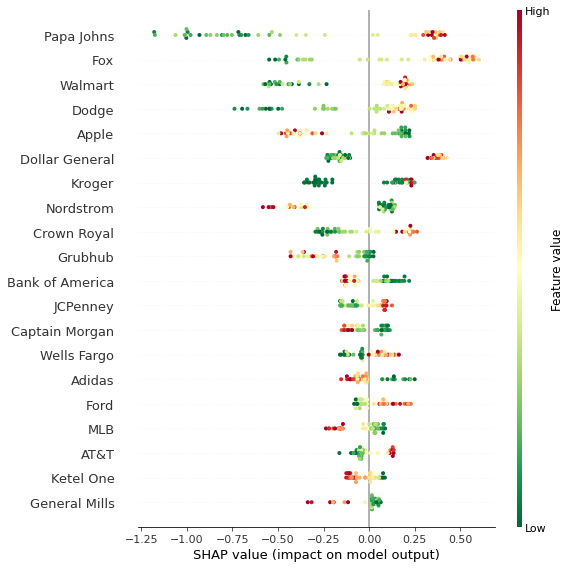

In [19]:
explainer = shap.Explainer(xgbBest, Xtrain)
shap_values = explainer.shap_values(Xtest)
shap_obj = explainer(Xtest)
# shap.plots.beeswarm(shap_obj)
redyellowgreen = cm.get_cmap('RdYlGn_r')
shap.summary_plot(shap_values, Xtest,cmap=redyellowgreen)

In [72]:
analysis = test[['state','rep_votes_share','dem_votes_share','maskActual']]
analysis['margin'] = analysis['rep_votes_share'] - analysis['dem_votes_share']
analysis['pred'] = xgbBest.predict(Xtest)
errors = []
for i, r in analysis.iterrows():
    a = r['maskActual']
    p = r['pred']
    if (a==1) and (p==1):
        errors.append(1)
    elif (a==1) and (p!=1):
        errors.append(0.5)
    elif (a==0) and (p==0):
        errors.append(-1)
    else:
        errors.append(-0.5)
analysis['errors'] = errors


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [74]:
analysis.to_csv('errors3.csv')

In [90]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [115]:
dump_list = xgbBest.get_booster().get_dump()
num_trees = len(dump_list)

In [116]:
num_trees

500

In [114]:
for i in range(1,11):
    fig, ax = plt.subplots(figsize=(50, 50),dpi=400)
    xgb.plot_tree(xgbBest,num_trees=i, ax=ax)
    # plot_tree(xgbBest)
    # plt.figure(figsize=(100, 100), dpi=1000)
    plotName = "plot"+str(i)+".png"
    plt.savefig(plotName)

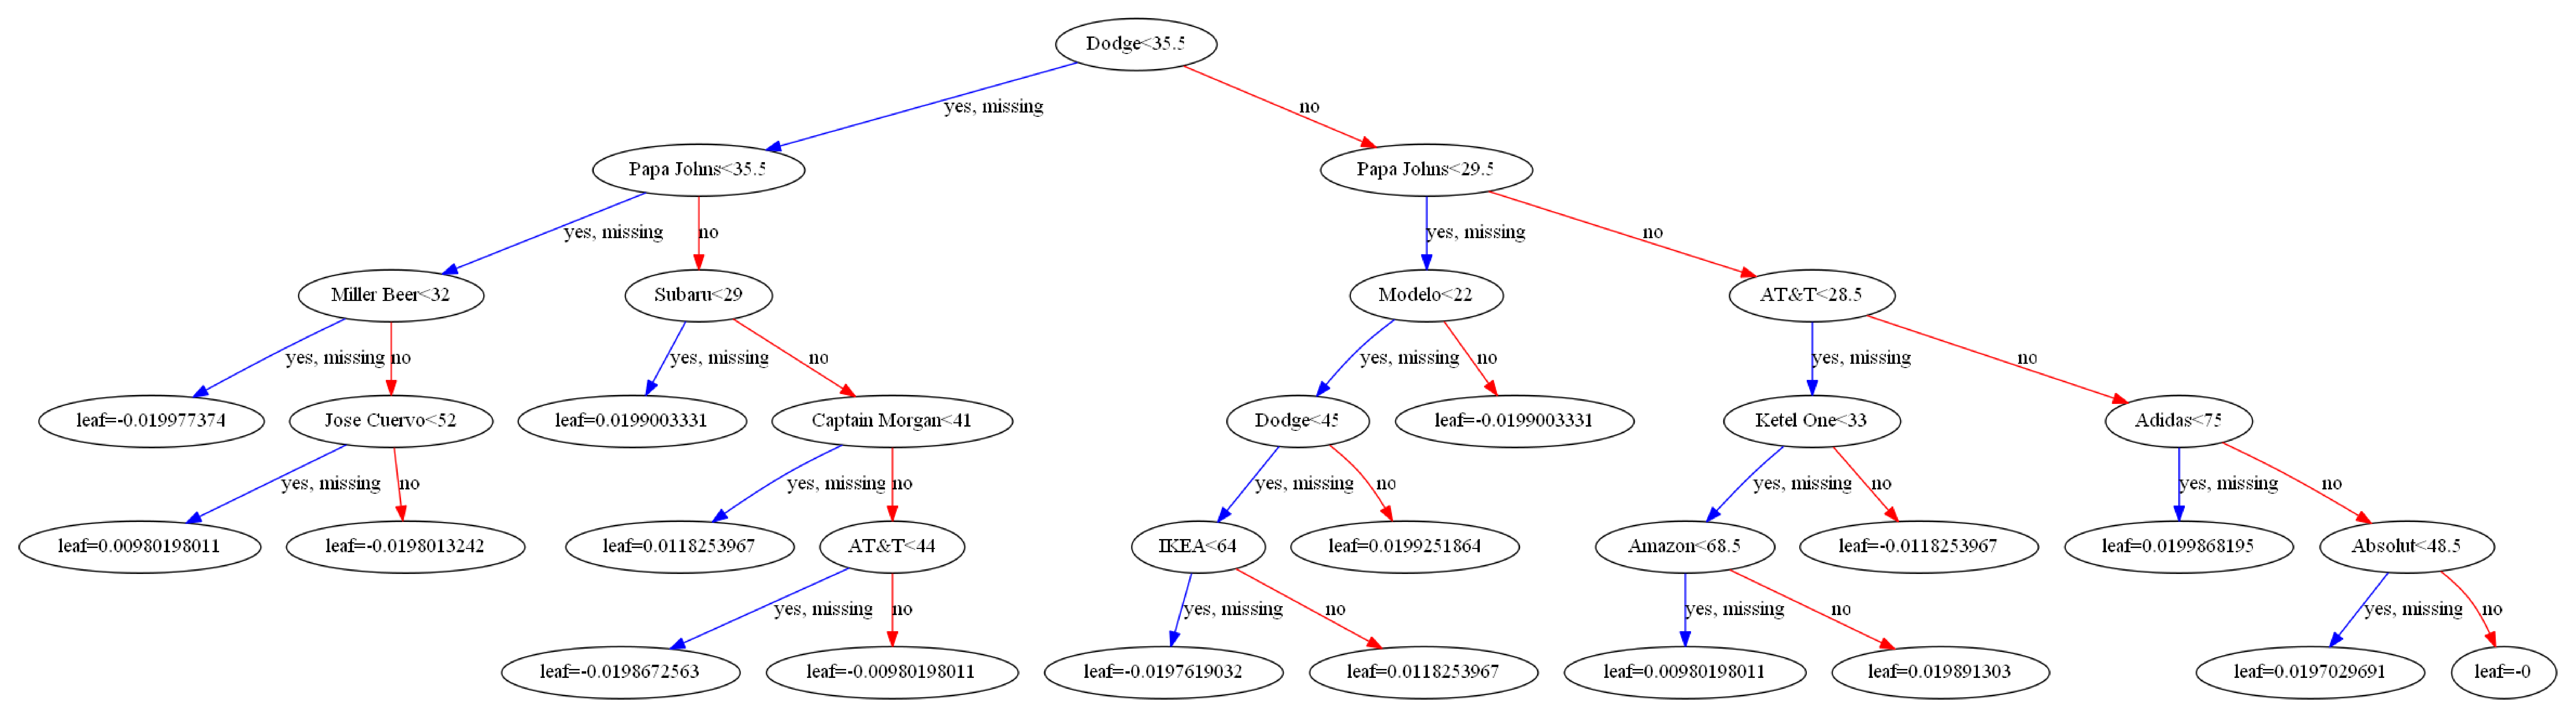

In [111]:
fig, ax = plt.subplots(figsize=(25, 25),dpi=400)
xgb.plot_tree(xgbBest,num_trees=0, ax=ax)
# plot_tree(xgbBest)
# plt.figure(figsize=(100, 100), dpi=1000)
plt.show()

<AxesSubplot:>

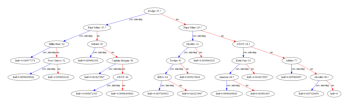

In [99]:
plot_tree(xgbBest)

In [118]:
pickle.dump(xgbBest, open('bestXGB.sav', 'wb'))

In [3]:
file = open('bestXGB.sav', 'rb')
xgbBest = pickle.load(file)